# markov chain basics

mit course on intro to prob with some more mathematical concepts in terms of sampling and markov chains

http://www.mit.edu/~dimitrib/probbook.html

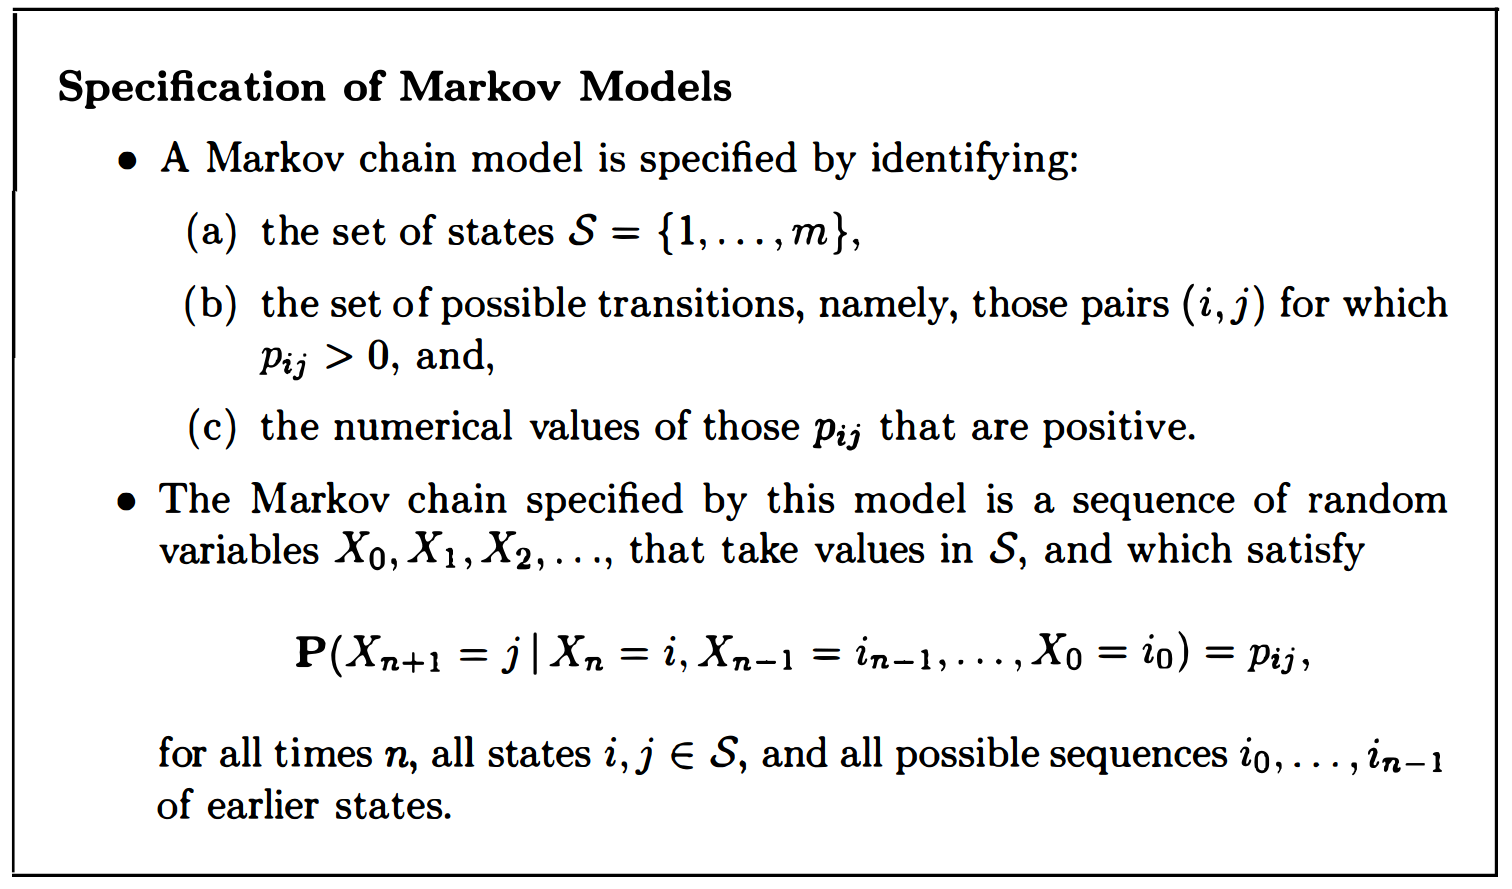

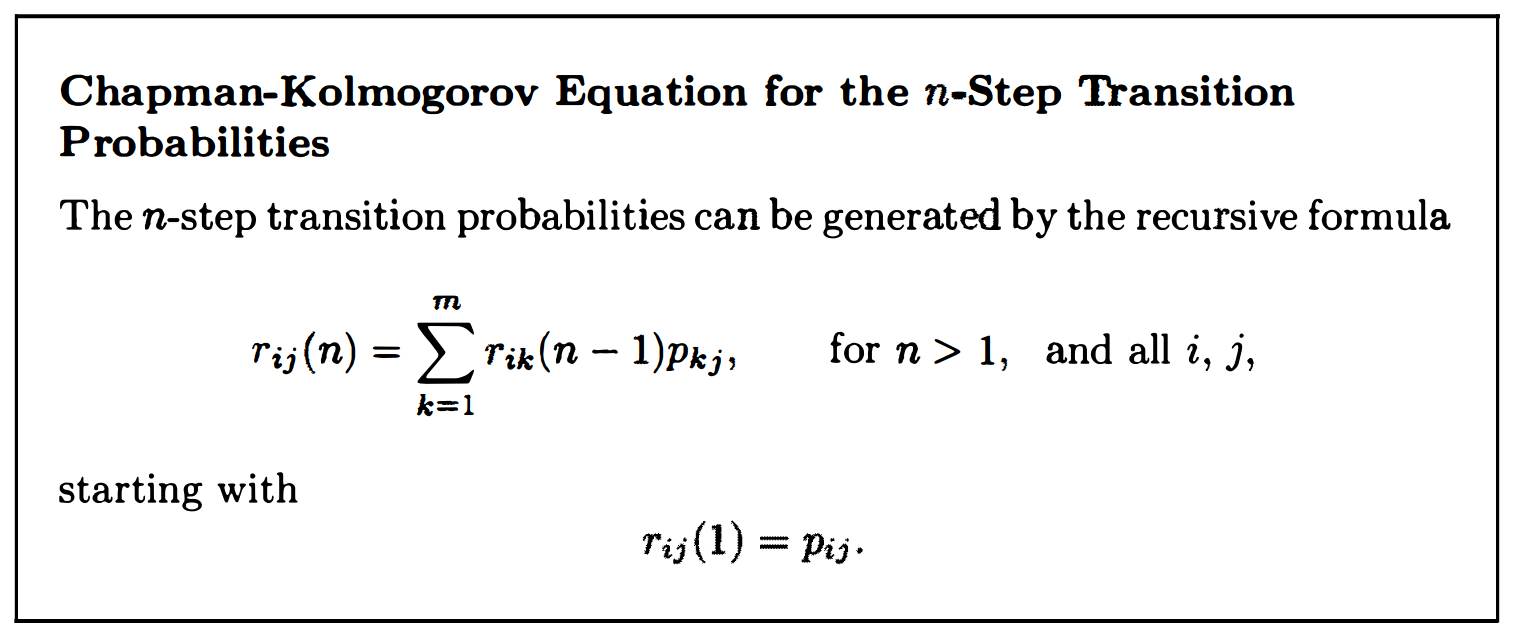

In [3]:
import numpy as np

#with matrix power
pij = np.array([[.8, .2], [.6, .4]])

from numpy.linalg.linalg import matrix_power

print(matrix_power(pij, 2))
#array([[ 0.76,  0.24],
#       [ 0.72,  0.28]])

print(matrix_power(pij, 3))
#array([[ 0.752,  0.248],
#       [ 0.744,  0.256]])

print(matrix_power(pij, 4))
#array([[ 0.7504,  0.2496],
#       [ 0.7488,  0.2512]])

print(matrix_power(pij, 5))
#array([[ 0.75008,  0.24992],
#       [ 0.74976,  0.25024]])


[[0.76 0.24]
 [0.72 0.28]]
[[0.752 0.248]
 [0.744 0.256]]
[[0.7504 0.2496]
 [0.7488 0.2512]]
[[0.75008 0.24992]
 [0.74976 0.25024]]


what this also means is that in 5 steps what is the probability of a transition from i to j

so in 5 steps there is a .24 prob of moving from 0 to 1

In [4]:
#as a recursion
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)

rij(pij, 5)

array([[0.75008, 0.24992],
       [0.74976, 0.25024]])

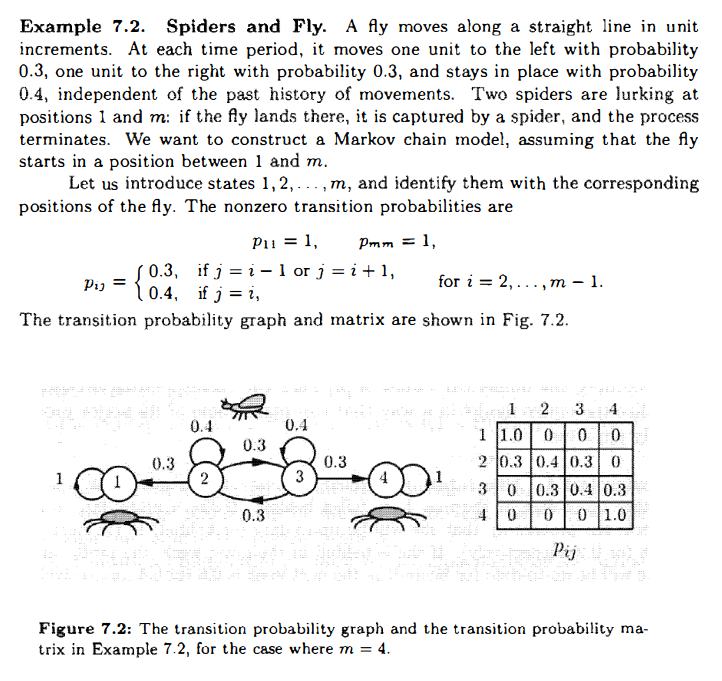


In [5]:
import numpy as np

#fly/spider transition probability matrix
pij = np.array([[1,0,0,0],[.3,.4,.3,0],[0,.3,.4,.3],[0,0,0,1.0]])

#where do flies end up after 5 steps
rij(pij, 5)

array([[1.     , 0.     , 0.     , 0.     ],
       [0.58263, 0.08404, 0.08403, 0.2493 ],
       [0.2493 , 0.08403, 0.08404, 0.58263],
       [0.     , 0.     , 0.     , 1.     ]])

note here this relates highly to page rank algo.....

some states after being visited once are certian to be visited again while for some other states this may note be the case.

state j is accessible from state i if for some n, the n-step transition probability rij (n) is positive; meaning there is a positive probability of reaching j starting from i after some number of time steps.

or

there is a possible sequence of states i0, i1,i2......in-1, j that strts at i and ends at j in which the transitions  (i0 to i1), (i1 to i2) ... (in-1 to j) all have positive probability.

A(i) is then the set of states that are accessible from i.

i is then **recurrent** if for every j that is accessible from i, i is also accessible from j. 

in otherwords for all j that belong to A(i) we have that i belongs to A(j)

when starting from i we can only visit states 𝑗 ∈ 𝐴(𝑖) from which i is accessible and from any future state there is always some probability of returning to i and, given enough time, this is certain to happen.

by repeating this arg, if a recurrent state is visited once, it is certain to be visited an infinite number of times.

a state is **transient** if it is not recurrent.

state i is transient if there is a state 𝑗 ∈ 𝐴(𝑖) such that i is not accessible from j.

after each visit to state i there is a positive probability that the state enters such a j.

given enough time this will happen and state i can not be visited again after that.

transient states will only be vvisited a finite number of times.

transience or recurrence is determined bu the arcs of the transition probability graph whose pairs (i, j) have pij > 0 and not by the base values of pij

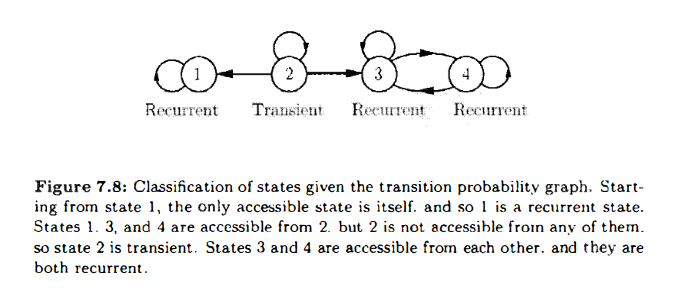

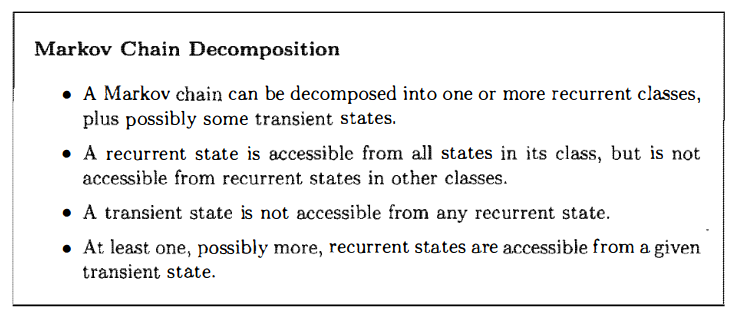

once the state enters or starts in a class of recurrent states it stays within that class since all states in the class are accessible from each other, all states in the class will be visited an infinite number of times

if the initial state is transient then the state trajectory will contain an initial portion consisting of transient states and a final portion consisting of recurrent states from the same class.

to initially understand long-term behavior of marvok chain models it is important to analyze chains that consist of a single recurrent class.

short-term behavior also requires analyzing the mechanism by which any particular class of recurrent states is entered starting from a given transient state.


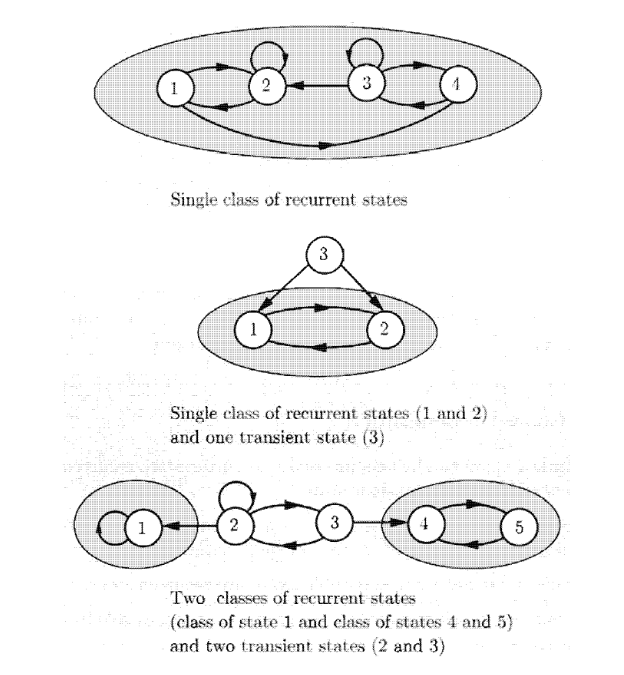

this relates to exploring starts mc algo for rl and monte carlo methods in rl where in rl the objective is control here it is observation.

http://incompleteideas.net/book/RLbook2020.pdf#%5B%7B%22num%22%3A1382%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C79.2%2C578.651%2Cnull%5D

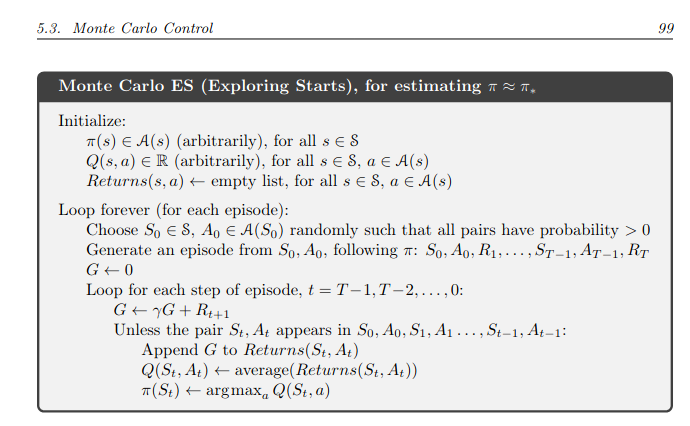

**periodocity**

another important characteristic of recurrent classes is the presence or absence of certian periodic pattern in the times that a state can be visited.

a recurrent class can be **periodic** if states can be grouped in d > l disjoin subsets S1....Sd so that all transitions from one subset lead to the next subset:

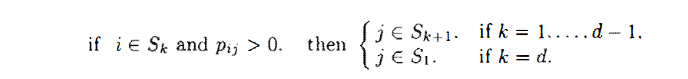

a recurrent class that is not **periodic** is said to be **aperiodic**

in a periodic recurrent class we move thru sequences of subsets in order and after d steps we end up in the same subset.

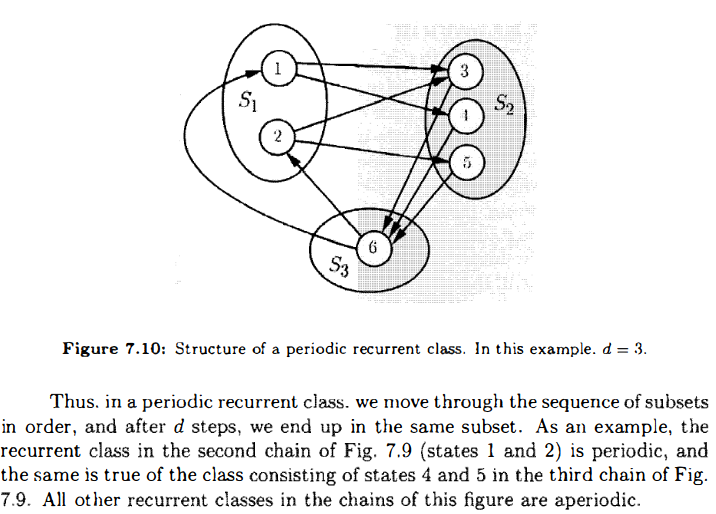

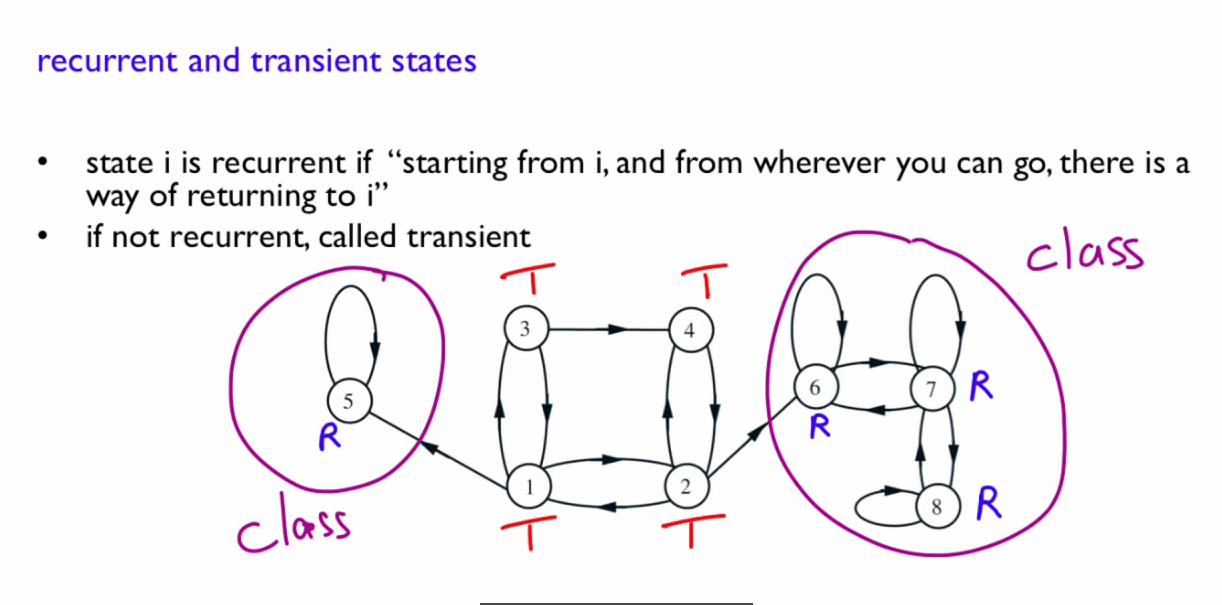

this explains beter

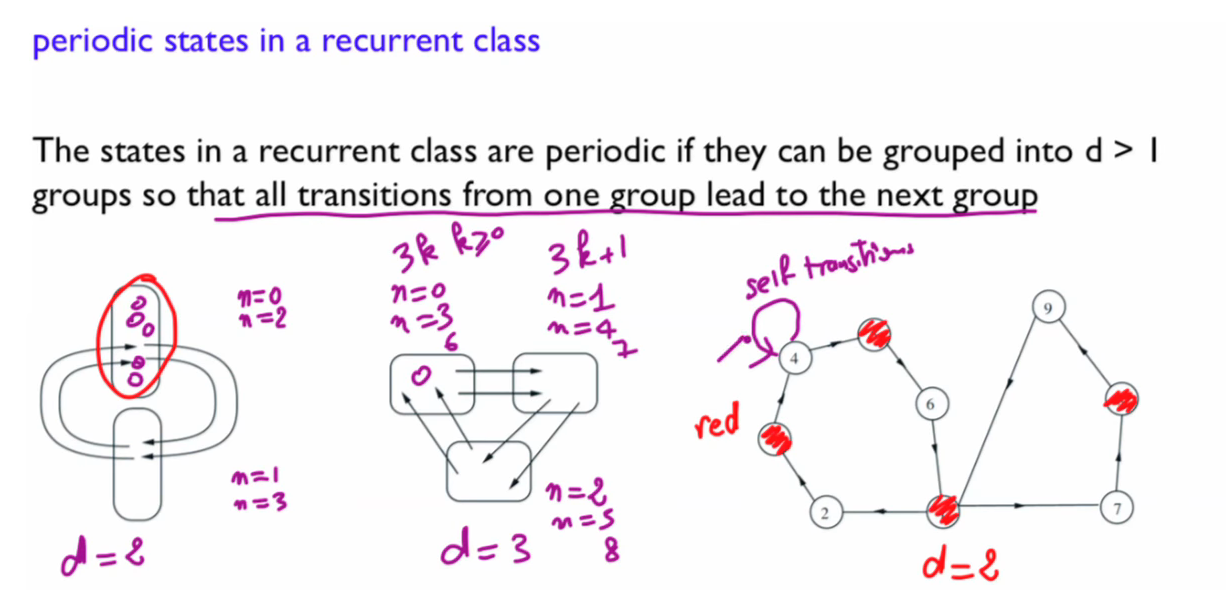

markov chains are periodic when in the right image state transitions are from red to white and from a red state the next time step is always red and vice versa

periodicity is violated when self transitions are present as the purple addition shows

given a periodic recurrent class a positive time , and a state i in the class there must exist one or more states j for which rij(n) = 0.

this is because starting from i only one of the sets Sk is possible at time n.

to check for aperiodicity of a given recurrent class R there is a special time n >= 1 and a special state i ∈ R from which all states in R can be reached in n steps.

ei: rij(n) >  0 for all j ∈ R.

for the first chain in fig 7.9 starting from state 1 all states are possible at time n = 3 so the unique recurrent class of that chain is **aperiodic**

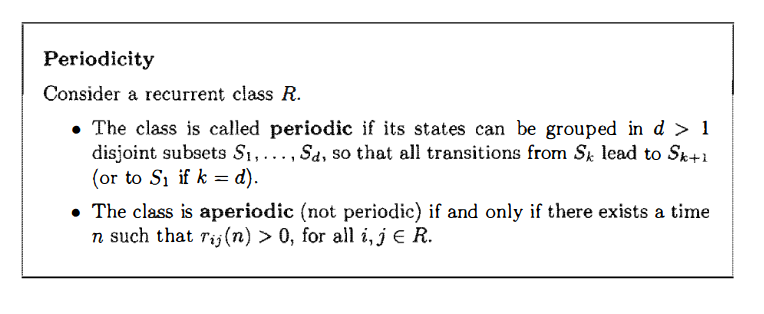

**steady-state behavior**

w/ markov chain models (in this context) we are interested in long-term state occupancy behavior in the n-step transition probabilities rij(n) where n is very large.

rij(n) may converge to steady-state values that are independednt of the initial state.

if there are 2 or more classes off recurrent states, the limiting values of rij(n) depend on the initial state wheere visiting j far into the future depends on whether j is in the same class as the initial state i.

understanding steadt-state behavior is easier with markov chains involving a single recurrent class plus some possible transient states.

a symptotic behavior of a multiclass chain can be understood in terms of the asymptotic behavior of a single class chain.

even for chains with a single recurrent class the rij(n) may fail to converge.

consider a recurrent class with two states; 1 and 2 that from state 1 we can only go to 2 and from 2 we can only go to 1 (p12 = p21 = 1).

then, starting at some state, we will be in that same state after any even number of transitions and in the other state after any odd number of transitions.

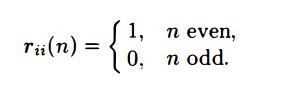

The recurrent class is then periodic and for such a class the rij(n) generally oscillates.

for every state j the probability of rij(n) being in state j approaches a limiting value that is independing of hte initial state i provided we exclude the situations of multiple recurrent classes and a periodic class.

thus the limiting factor is denoted by $\pi$

$\pi$<sub>j</sub> $\approx$ P(X<sub>n</sub> = j), when n is large

which is the steady-state probability of j.


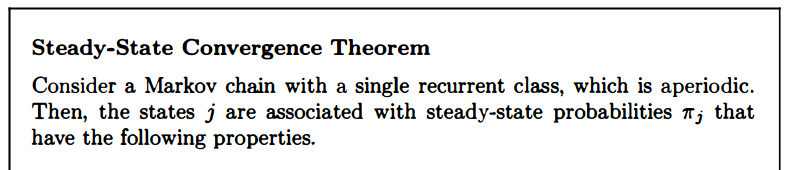

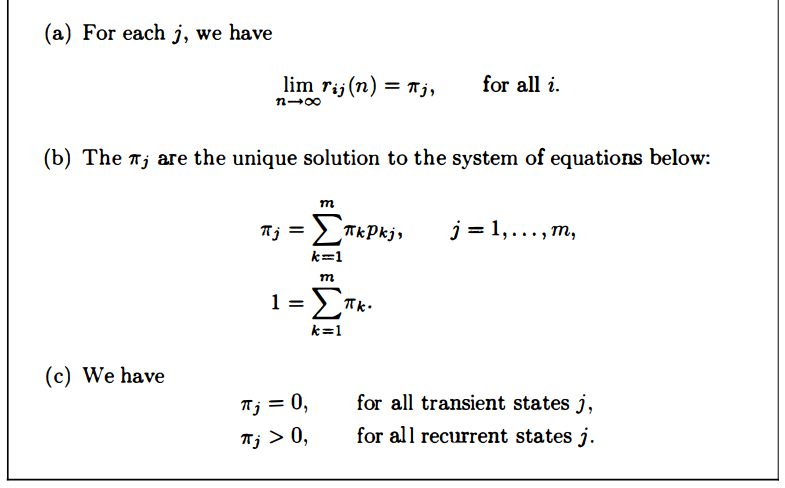

this again can be found rather than setting n to infinity but looking for an acceptible min change like with dynamic programming sweeps in rl or how page rank operates

the steady-state probs $\pi$<sub>j</sub>  will sum to 1 and form a prob distirbution state space called the stationary distrib of the chain.

if the initial state is chosed according to the stationary distirbution where
P(X<sub>0</sub> = j) = $\pi$<sub>j</sub>, for j = 1,...,m

then using the total probability theorem we have 

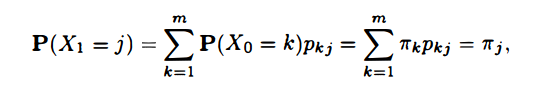

where the last equality follows from part b of the steady-state convergence theorem and we obtain P(X<sub>n</sub> = j) = $\pi$<sub>j</sub> for all n and j.

if the initial state is chosed according to the stationary distribution, the state at any future time will have the same distribution.

The following is the balance equations that are a cosnequence of part (a) of the steady-state convergence theorem and of the Chapman-Kolmogorov equation.

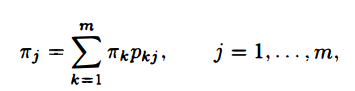

Where once the convergence of rij(n) to some $\pi$<sub>j</sub> is acheived the following equation is considered to take the limit of boths sides as n approaches infinity and recover the balance equations.

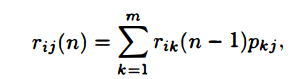

With the normalization equation below the balance equations can be solved to obtain $\pi$<sub>j</sub>

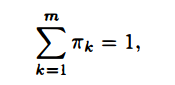

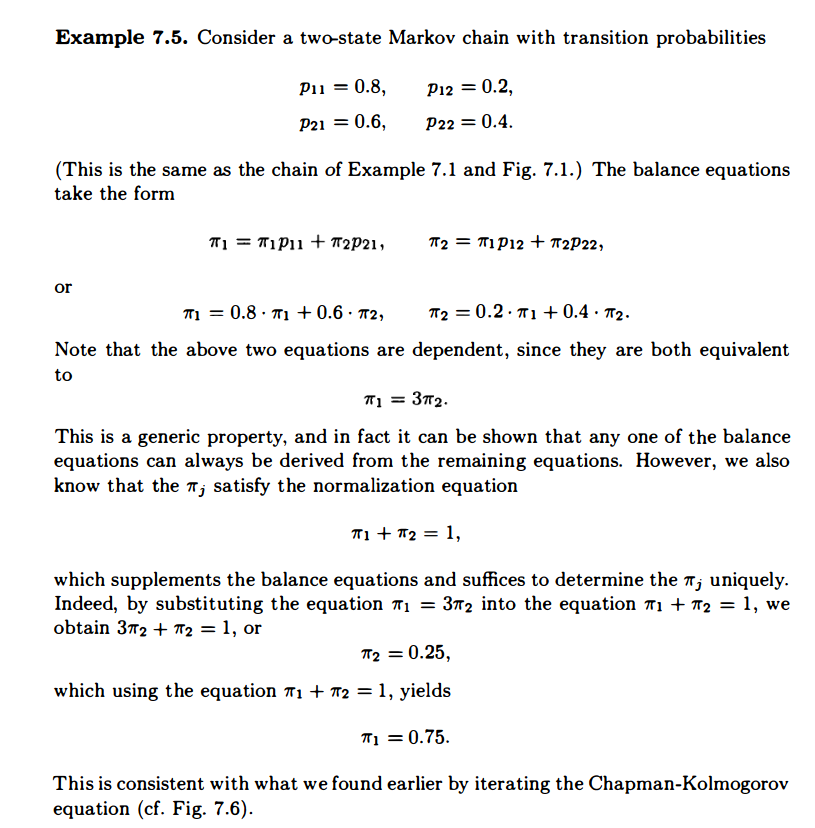

In [2]:
import numpy as np

pij = np.array([[.8, .2], [.6, .4]])


#as a recursion
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)
    

rij(pij, 20)    

array([[0.75, 0.25],
       [0.75, 0.25]])

In [1]:
# alternative equilibrium distribution function
#this will only converge if the markov chain is reducible and has periodocity
import numpy as np

def equilibrium_distribution(p_transition):
    """This implementation comes from Colin Carroll, who kindly reviewed the notebook"""
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    # Moore-Penrose pseudoinverse = (A^TA)^{-1}A^T
    pinv = np.linalg.pinv(A)
    # Return last row
    return pinv.T[-1]

pij = np.array([[.8, .2], [.6, .4]])

equilibrium_distribution(pij)

array([0.75, 0.25])

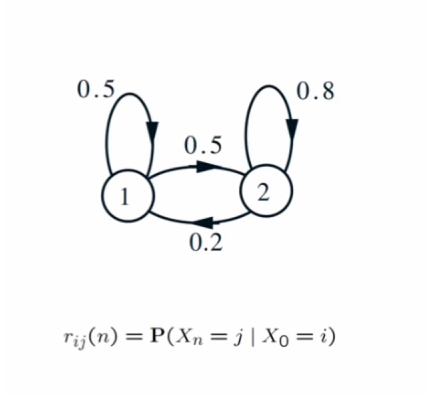

In [3]:
import numpy as np

pij = np.array([[.5, .5], [.2, .8]])

#as a recursion
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)
    
def equilibrium_distribution(p_transition):
    """This implementation comes from Colin Carroll, who kindly reviewed the notebook"""
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    # Moore-Penrose pseudoinverse = (A^TA)^{-1}A^T
    pinv = np.linalg.pinv(A)
    # Return last row
    return pinv.T[-1]

print(rij(pij, 2))
print(rij(pij, 3))
print(rij(pij, 4))
print(rij(pij, 100))
print(equilibrium_distribution(pij))

#importance of the initial state disappears after enough time
#initial state tells you something in the beginning 
#but become less relevant as markov chain appraches a steady state
#markov chains do not always converge to steady probabilities for state presence
#if a chain does not have  periodicity concerns or multiple recurrent classes then convergence is easy
#long term probability on transient states is 0


[[0.35 0.65]
 [0.26 0.74]]
[[0.305 0.695]
 [0.278 0.722]]
[[0.2915 0.7085]
 [0.2834 0.7166]]
[[0.28571429 0.71428571]
 [0.28571429 0.71428571]]
[0.28571429 0.71428571]


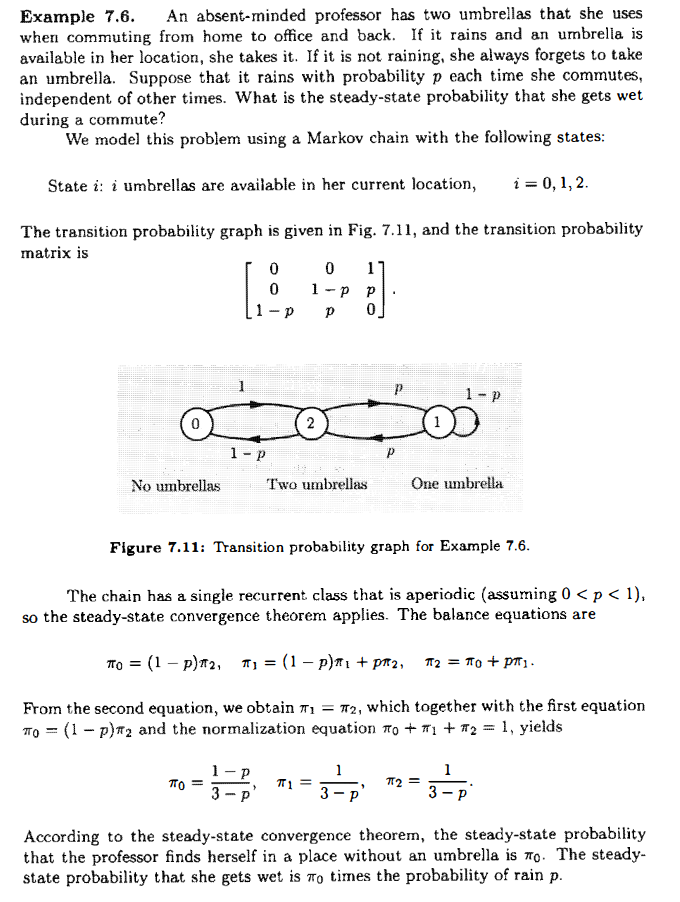

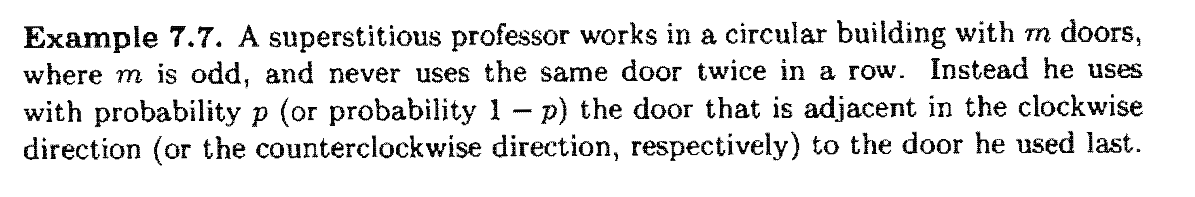

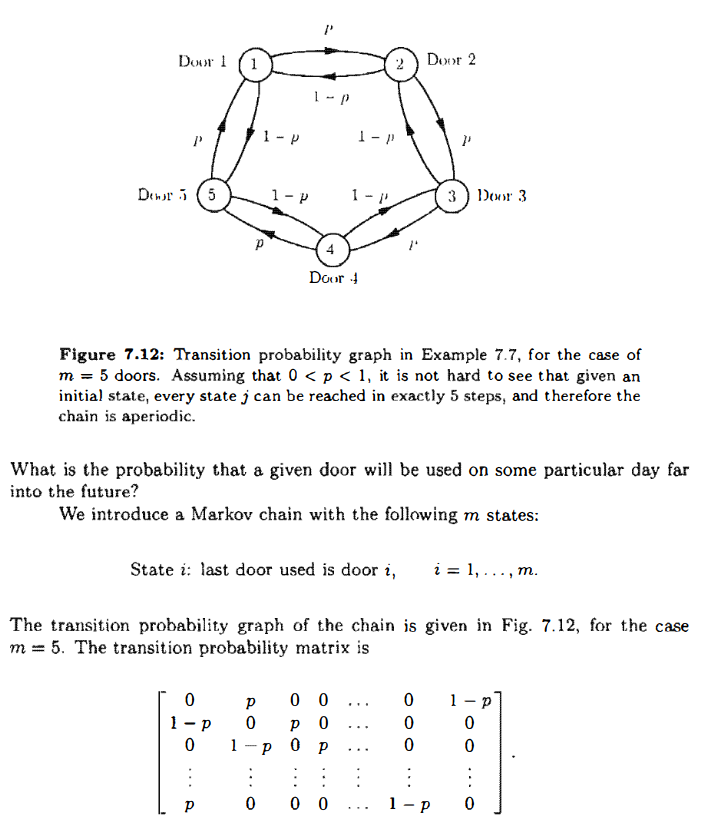

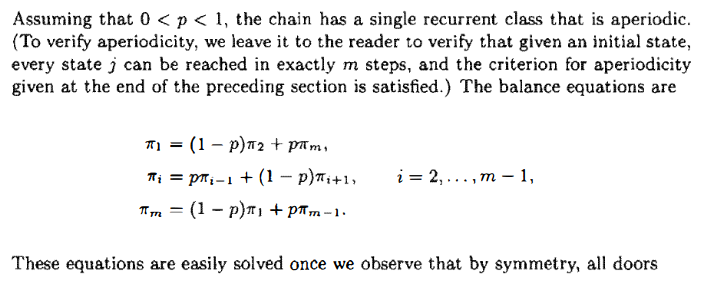

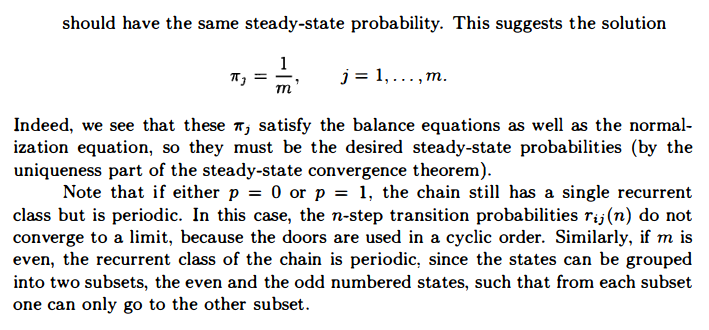

**long term frequency interpetations**

probabilities are often interpeted as relative frequencies in an infinitely long string of independent trails. The steady-state probabilities of a Markov chain admit a similar interpetation despite the absence of independence.

go back to the machine repair chain

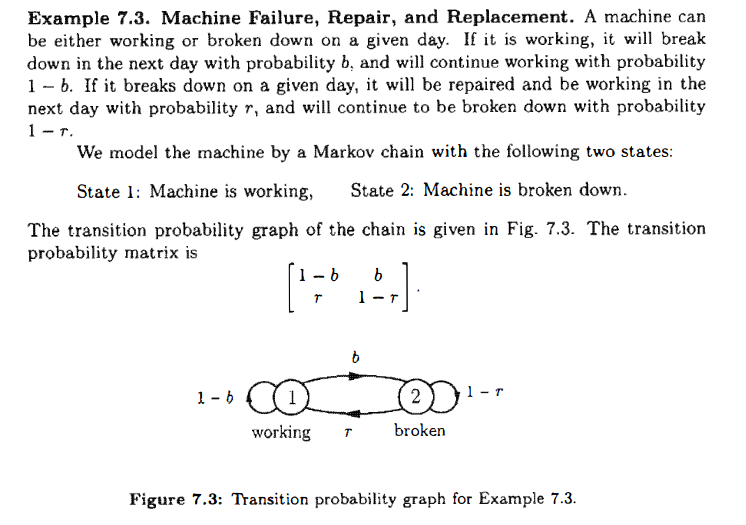

each time the machine breaks costs 1$ to repair.

to model long-term expected cost of repair to day two possible solutions exist
- view as the expected value of the repair cost on a randomly chosen day far into the future using the steady state probability of the broken down state.
- calculate the total expected repair cost in n days where n is very large and divide by n.


In [1]:
import numpy as np

broken = 0.05
repair = 0.50

pij = np.array([[1-broken, broken], [repair, 1-repair]])

pij

array([[0.95, 0.05],
       [0.5 , 0.5 ]])

In [3]:
#as a recursion
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)

steady_state_rij = rij(pij, 1000)

steady_state_rij

array([[0.90909091, 0.09090909],
       [0.90909091, 0.09090909]])

In [2]:
# alternative
import numpy as np

def equilibrium_distribution(p_transition):
    """This implementation comes from Colin Carroll, who kindly reviewed the notebook"""
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    # Moore-Penrose pseudoinverse = (A^TA)^{-1}A^T
    pinv = np.linalg.pinv(A)
    # Return last row
    return pinv.T[-1]

broken = 0.05
repair = 0.50

pij = np.array([[1-broken, broken], [repair, 1-repair]])

equilibrium_distribution(pij)

array([0.90909091, 0.09090909])

In [8]:
days = 100
repair_cost = 1

expected_cost_1 = repair_cost * 0.09090909

print("per day repair cost: ", expected_cost_1)

total_cost = expected_cost_1 * days

print("total cost over days: ", total_cost)

per day repair cost:  0.09090909
total cost over days:  9.090909


In [5]:
import numpy as np
from matplotlib import pyplot as plt
 
broken = 0.05
repair = 0.50

pij = np.array([[1-broken, broken], [repair, 1-repair]])

#initialize pi_0
pi_0=np.array([0.5, 0.5])
 
#set up the array to accumulate the state probabilities at times t=1 to 10
pi=[]
pi.append(pi_0)
 
P_mul=pij.copy()
 
#calculate the state probability for each t and store it away 
for i in range(10):
    P_mul=np.matmul(P_mul,pij)
    pi_t = np.matmul(pi_0,P_mul)
    pi.append(pi_t)
 
pi = np.array(pi)

pi

array([[0.5       , 0.5       ],
       [0.82625   , 0.17375   ],
       [0.8718125 , 0.1281875 ],
       [0.89231562, 0.10768437],
       [0.90154203, 0.09845797],
       [0.90569391, 0.09430609],
       [0.90756226, 0.09243774],
       [0.90840302, 0.09159698],
       [0.90878136, 0.09121864],
       [0.90895161, 0.09104839],
       [0.90902822, 0.09097178]])

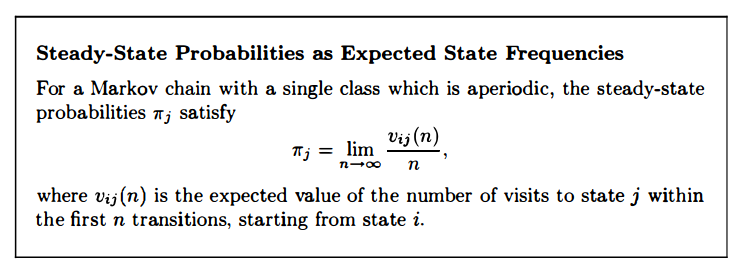

using this interpetation $\pi$<sub>j</sub> is the long term expected fraction of time that the state is equal to j.

each time that state j is visited there is a probability p<sub>jk</sub> that the next transition takes us to state k.

thus $\pi$<sub>j</sub>p<sub>jk</sub> can be viewed as the long-term expected fraction of transitions that move the state from j to k.

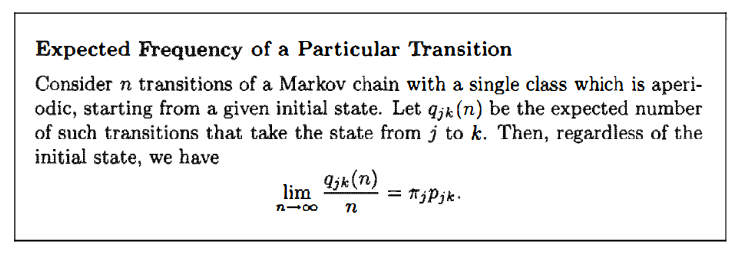

given the frequency interpetation of $\pi$<sub>j</sub> and $\pi$<sub>j</sub>p<sub>jk</sub>  the balance equation:

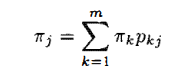

expresses the fact that the expected frequency $\pi$<sub>j</sub> of visits to j is equal to the sum of the expected frequencies $\pi$<sub>j</sub>p<sub>jk</sub> of transitions that lead to j:

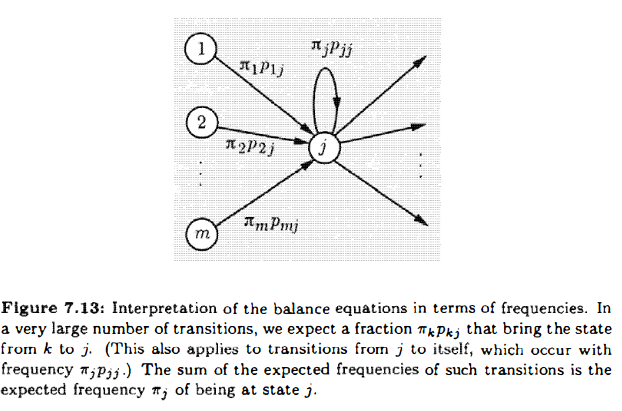

steady state is only possible under specific conditions:

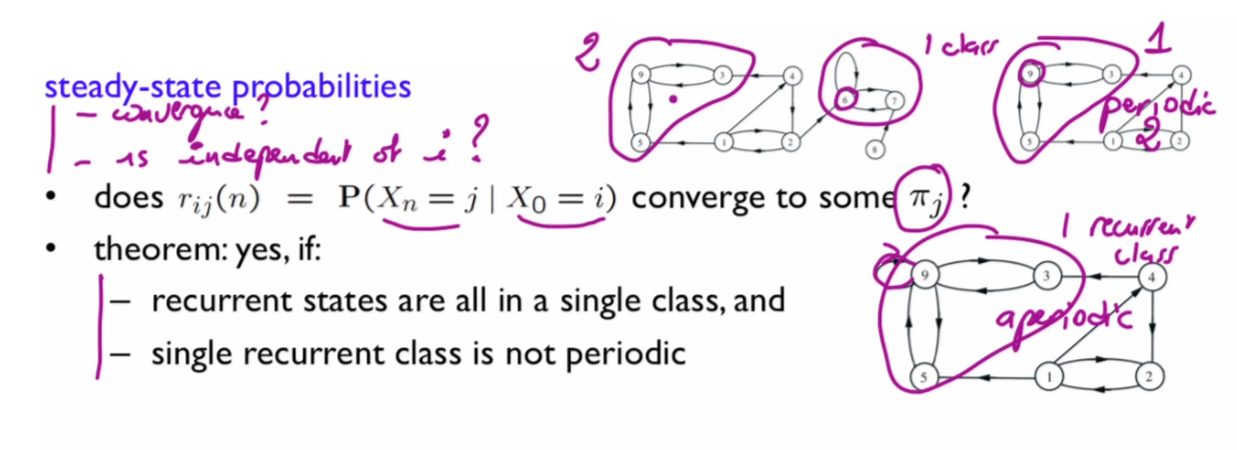

In [15]:
#expected frequency of transitions

pi_2 = equilibrium_distribution(pij)

j = 0

k = 1

pi_final = 0
total_probs = 0

pi_final += pi_2[k] * pij[k][j]

total_probs += pi_final
        
print("state 0 to state 1:", pi_final)

j = 1

k = 0

pi_final = 0

pi_final += pi_2[k] * pij[k][j]
        
pi_final

total_probs += pi_final

print("state 1 to state 0:", pi_final)

j = 0

k = 0

pi_final = 0

pi_final += pi_2[k] * pij[k][j]
        
pi_final

total_probs += pi_final

print("state 0 to state 0:", pi_final)

j = 1

k = 1

pi_final = 0

pi_final += pi_2[k] * pij[k][j]
        
pi_final

total_probs += pi_final

print("state 1 to state 1:", pi_final)

print("total probs :", total_probs)

state 0 to state 1: 0.04545454545454536
state 1 to state 0: 0.04545454545454547
state 0 to state 0: 0.8636363636363639
state 1 to state 1: 0.04545454545454536
total probs : 1.0


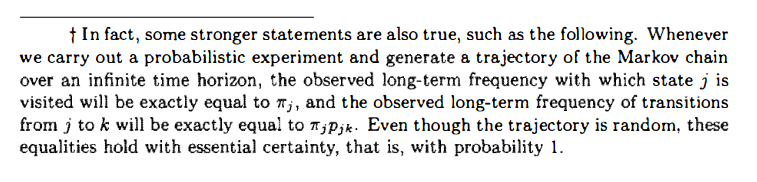

expresses the fact that the expected frequency $\pi$<sub>j</sub> of visits to j is equal to the sum of the expected frequencies $\pi$<sub>j</sub>p<sub>jk</sub> of transitions that lead to j:

![image-4.png](attachment:image-4.png)

**birth-death process**

markov chain which the states are linearly arranged and transitions can only occur to a neighboring state, or else leave the state uncahnged.

these arise in many contexts and especially queing theory.

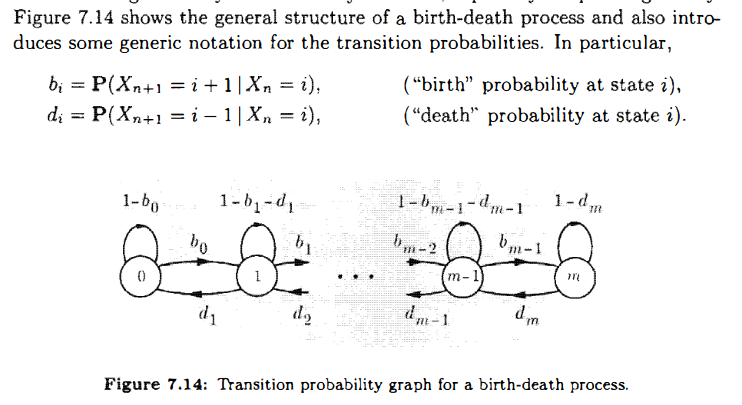

with birth death processes balance equations are substatially simplified.

with two neighboring states i and i+1 any trajectory a transition from i to i+1 has to be followed by a transition from i + 1 to i before another i to i+1 can occur.

the expected frequency of transitions from i to i+1 is $\pi$<sub>i</sub>b<sub>i</sub> must be equal to the the expected frequencies of transitions from i+1 to i, which is $\pi$<sub>i+1</sub>d<sub>i+1</sub> leading to local balance equations

$\pi$<sub>i</sub>b<sub>i</sub> = $\pi$<sub>i+1</sub>d<sub>i+1</sub> , i = 0, 1, ..., m-1

using the local balance equations we obtain 

$\pi$<sub>i</sub> = $\pi$<sub>0</sub>$\frac{b_0b_1...b_{i-1}}{d_0d_1...d_{i-1}}$ , i = 1,2, ... m

from which using the normalization equation

$\sum_{i} \pi_i$ = 1

the steady-state probabilities $\pi_i$ are easily computed

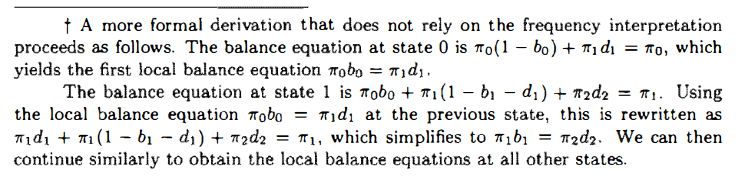

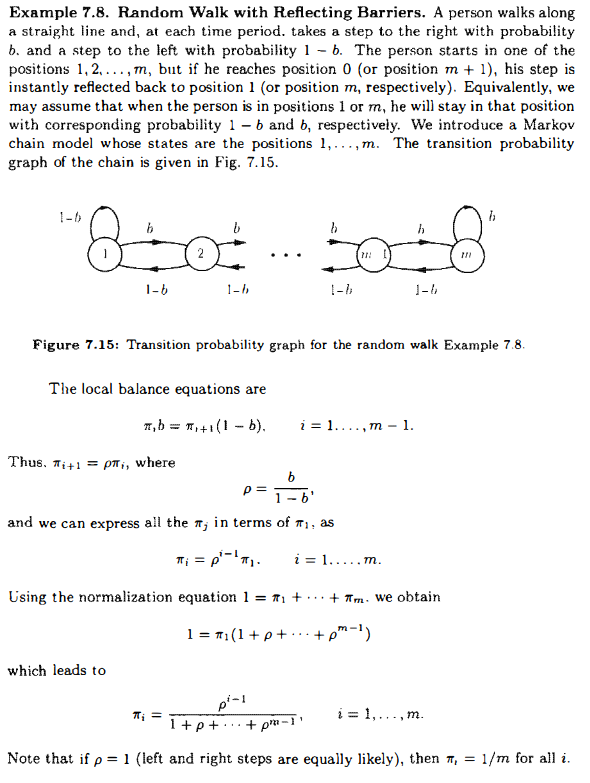

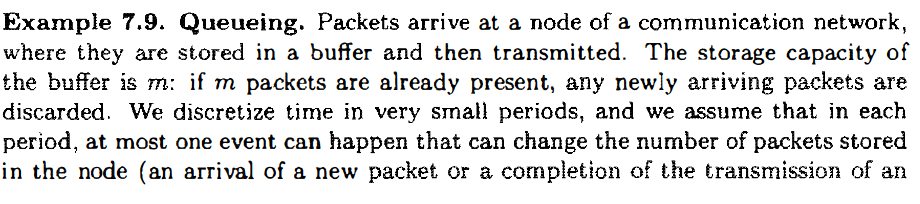

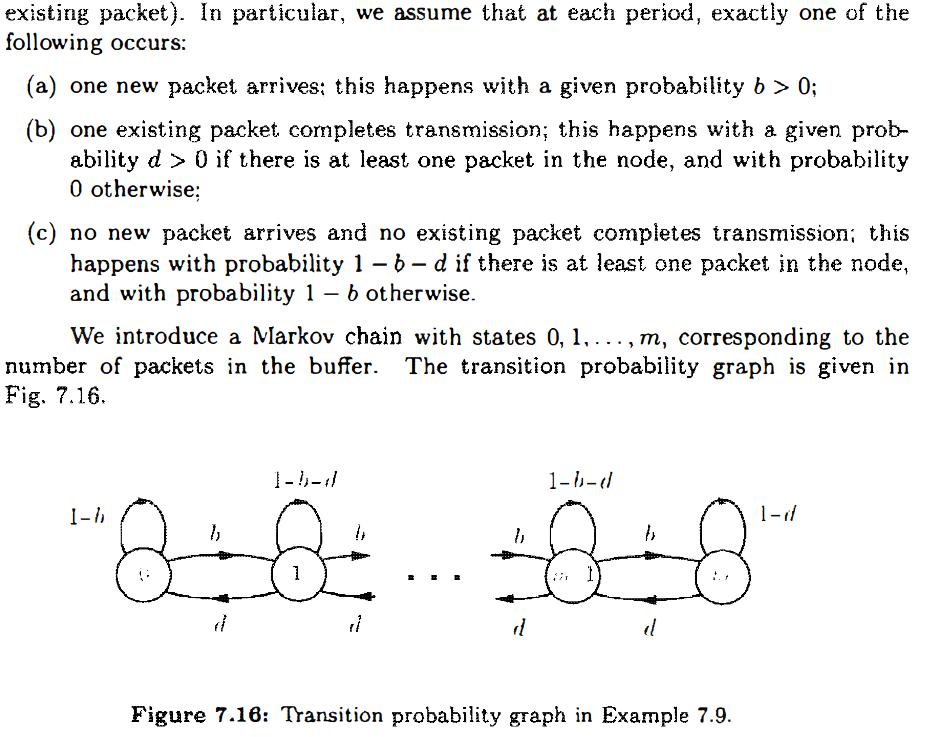

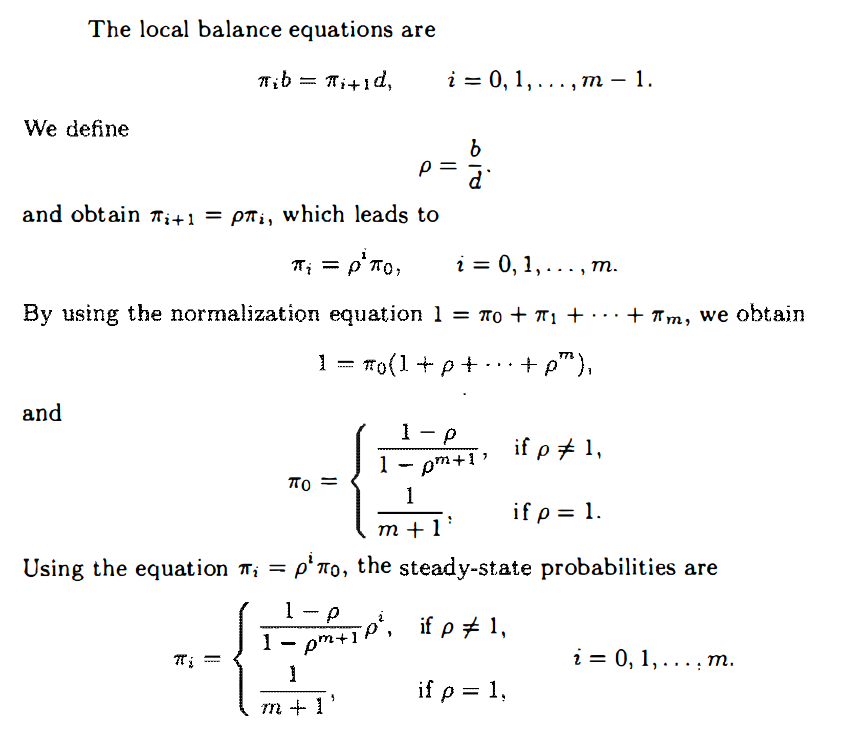

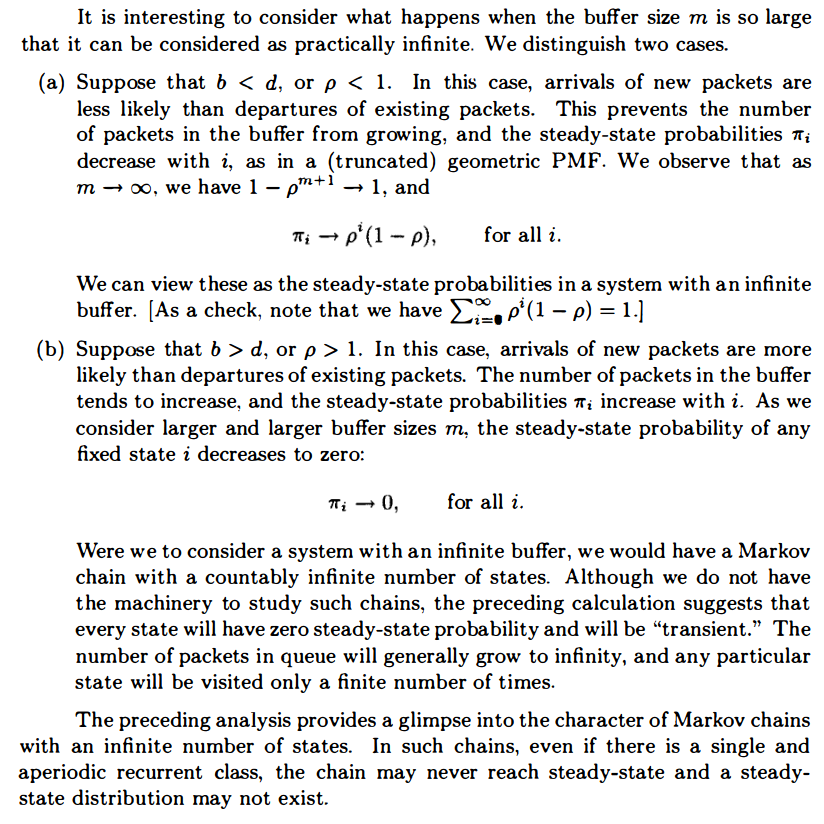

in python the birdepy package can mitigate birth death processes

https://arxiv.org/pdf/2110.05067.pdf

https://birdepy.github.io/

birth death processes models with markov chains can be useful for epidemiology modeling or disease spread modeling

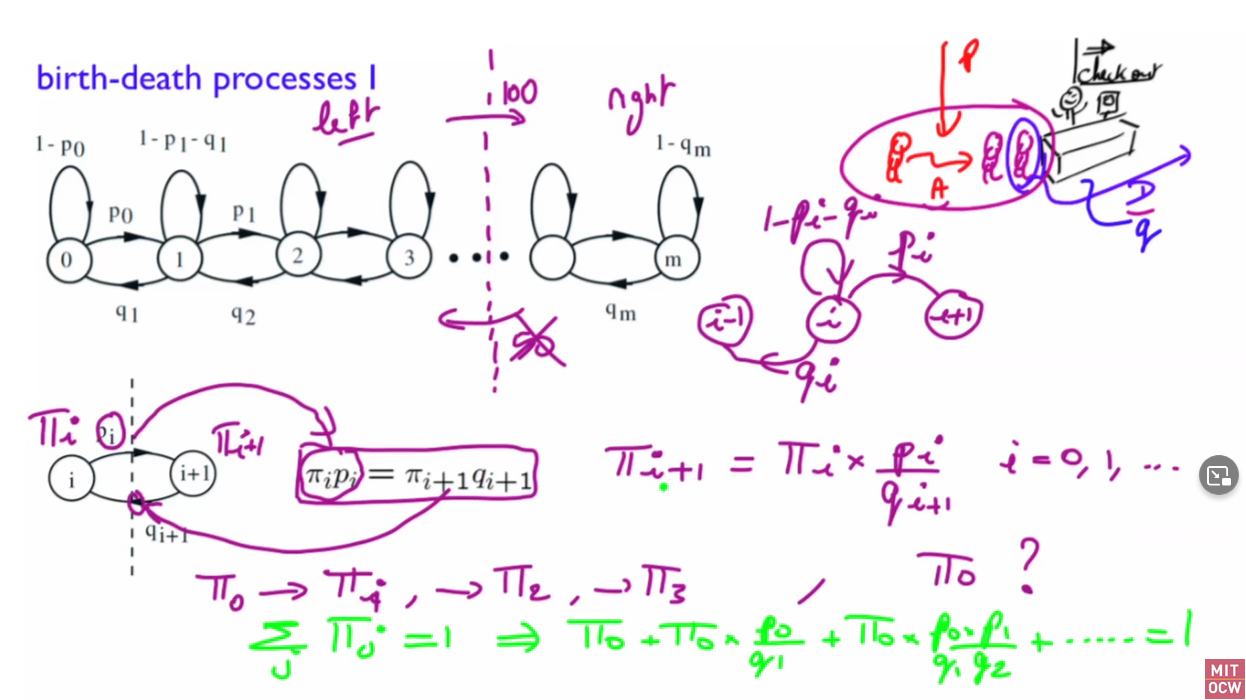

distribs converge to a dshifted geometric distrib starting at 0 rather than 1 when looking at a birth death process in queuing systems

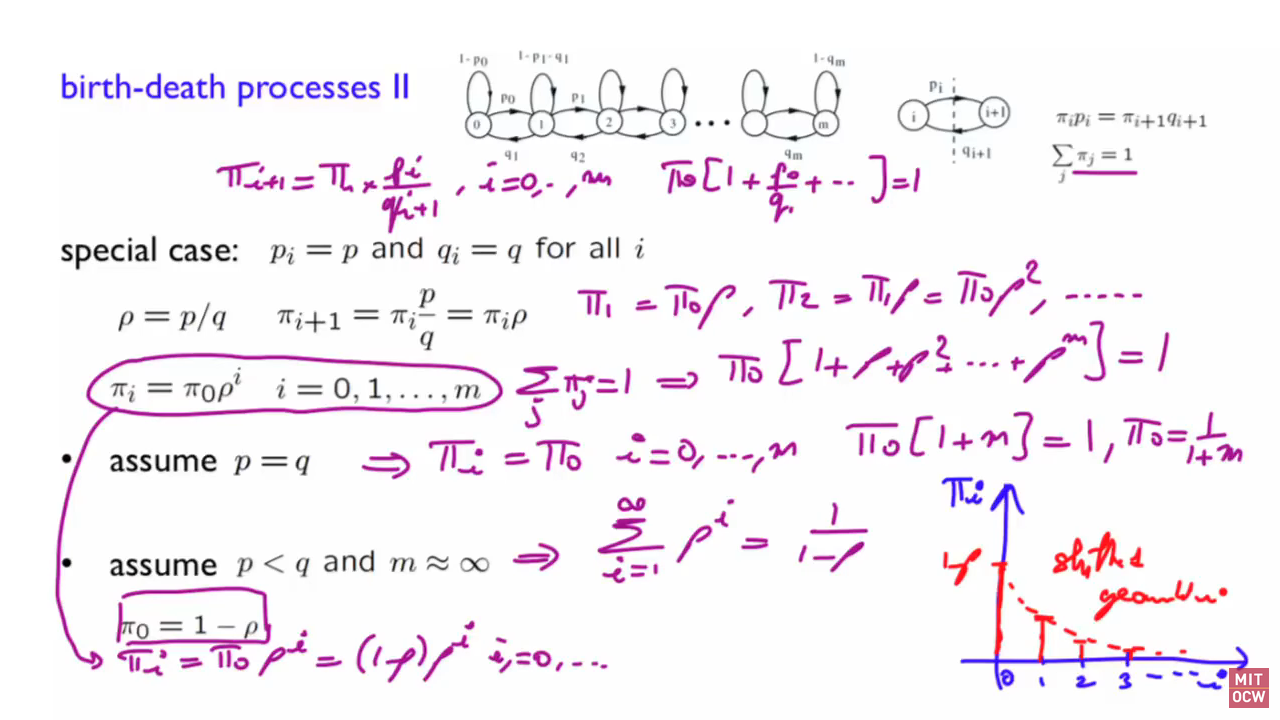

much of this is dependent on rho and its value where rho is the ratio or p (prob of moving right) divided by q (prob of moving left)



# absorption probabilities and expected time to absoprtion

when starting in a transient state the behavior of the markov chain after a recurrent state is encountered is immaterial.

to answer what is the first recurrent state to be entered as well as the  time until this occurs we have to focus on the case where every recurrent state k is absorbing

### P<sub>kk</sub>= 1, P<sub>kj</sub> for all j != k

if there is a unique abosrbing state K, its steady-state probability is 1 because all other states are transient and have zero steady state prob and will be reached with prob 1 from any initial state.

if there are multiple absorbing states the probability that one of them will eventuall be reached is still 1 but the identity of that absorbing state is random and the associated probs may depend on the statring state.

in the sequel we can fix a particular abosrbing state, s, and consider the absorption prob a<sub>i</sub> that s is eventually reached starting for i:

### a<sub>i</sub> = P(X<sub>n</sub> eventually becomes equal to the abosrbing state s|X<sub>0</sub> = i)

absorption probs can then be obtained by solving a system of linear equations as indicated below

# absorption prob equations

consider a markov chain where each state is either transient or absorbing and fix a particular abosrbing state s

then the probs a<sub>i</sub> of reaching state s from i are the unique solution to the equations

### 1. a<sub>s</sub> = 1
### 2. a<sub>i</sub> = 0 for all abosrbing i != s
### 3. a<sub>i</sub> = $\sum_{j}^m p_{ij}a_{j}$ for all transient i

equations 1 and 2 are apparent from the prior definition.

let us consider a transient state i and let A be the event that state s is eventually reached we have:

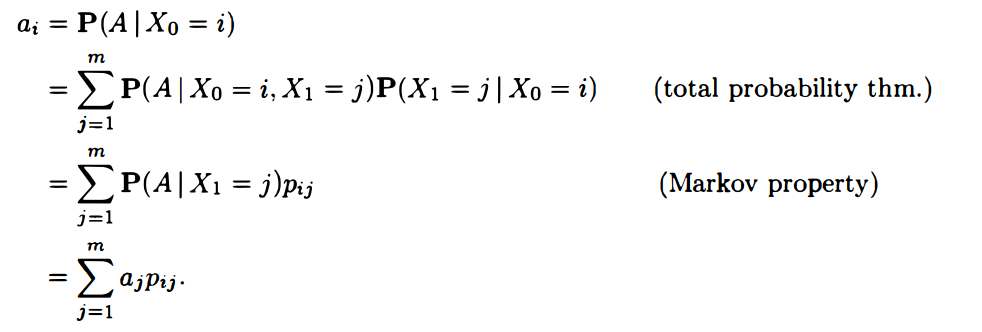

considering that we have linear systems to solve for numpy.linalg.solve may be useful once the equations are defined as a matrix...the final link is especially interesting as it applies using netrowk x 
- https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
- https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/
- https://stackoverflow.com/questions/11705733/best-way-to-calculate-the-fundamental-matrix-of-an-absorbing-markov-chain
- https://albertum.medium.com/absorbing-markov-chain-limiting-matrix-5c512b589926


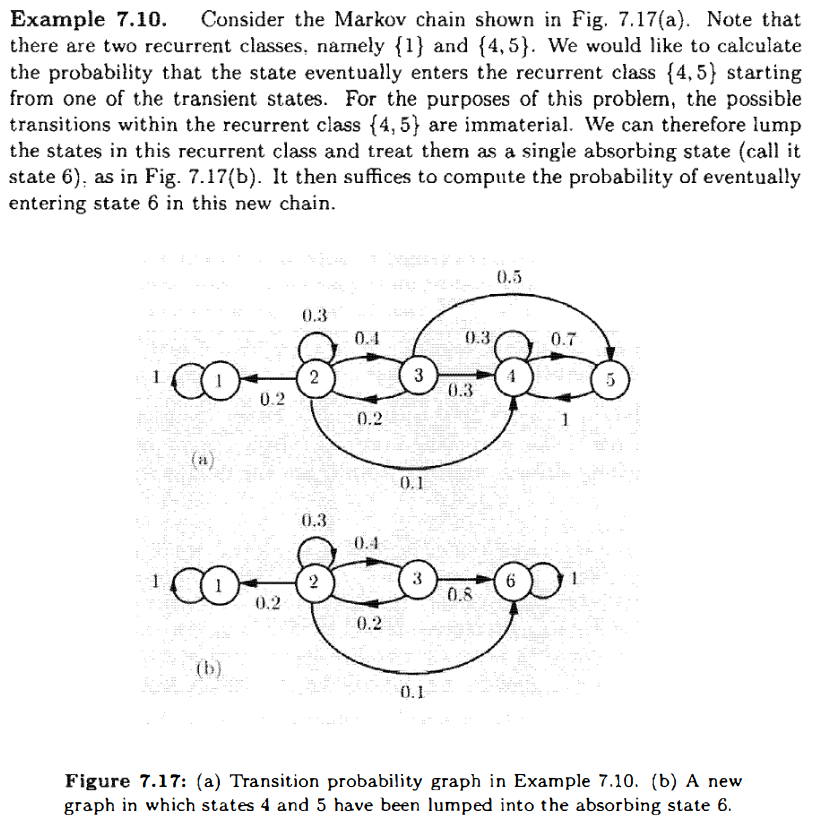

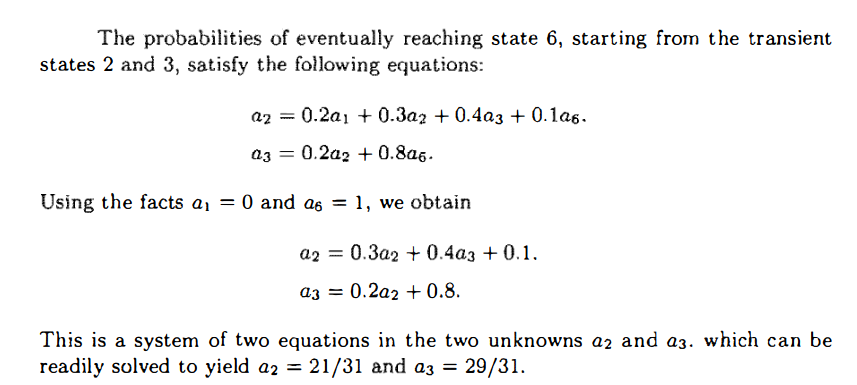


In [6]:
#see above for orig

# break into
#x = .3x + .4y +.1
#y = .2x + .8

#which resolves to 
#-.7x + .4y = -.1
#-.2x + y = .8

import numpy as np

a = [[-0.7, 0.4],[-0.2, 1]]
#x = [[x],[y]]
b = [[-0.1],[0.8]]

A = np.array(a)
inv_a = np.linalg.inv(A)

B = np.array(b)

#to find x and y given matrices a and b
X = np.linalg.inv(A).dot(B)

print(X)

#check
print(21/31)
print(29/31)



[[0.67741935]
 [0.93548387]]
0.6774193548387096
0.9354838709677419


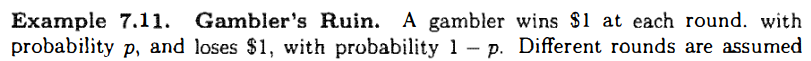

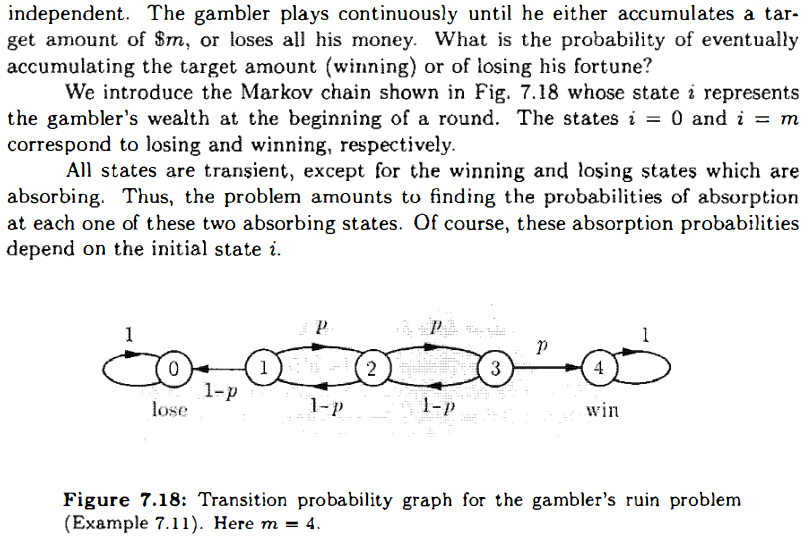

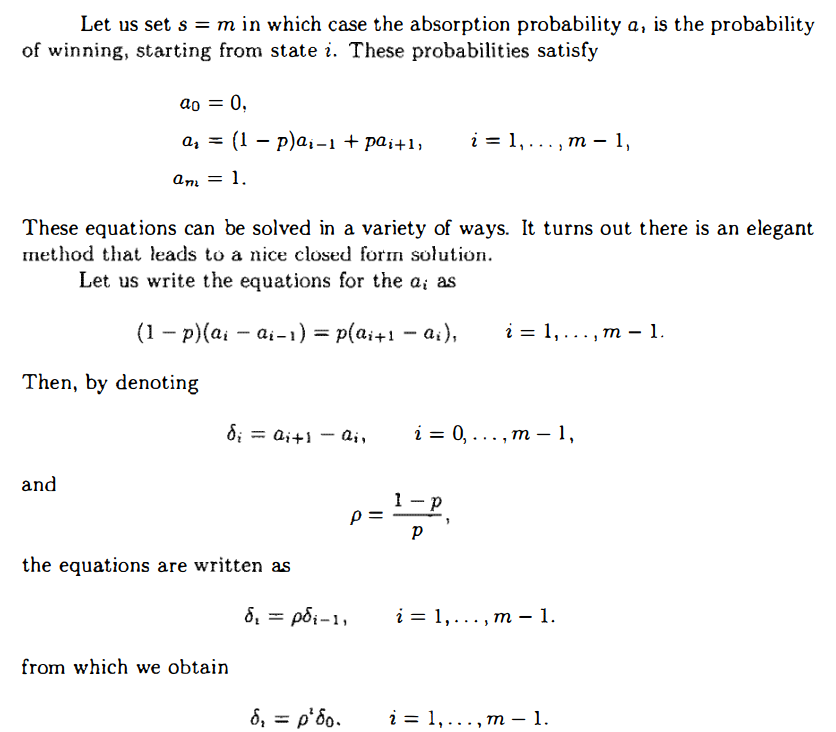

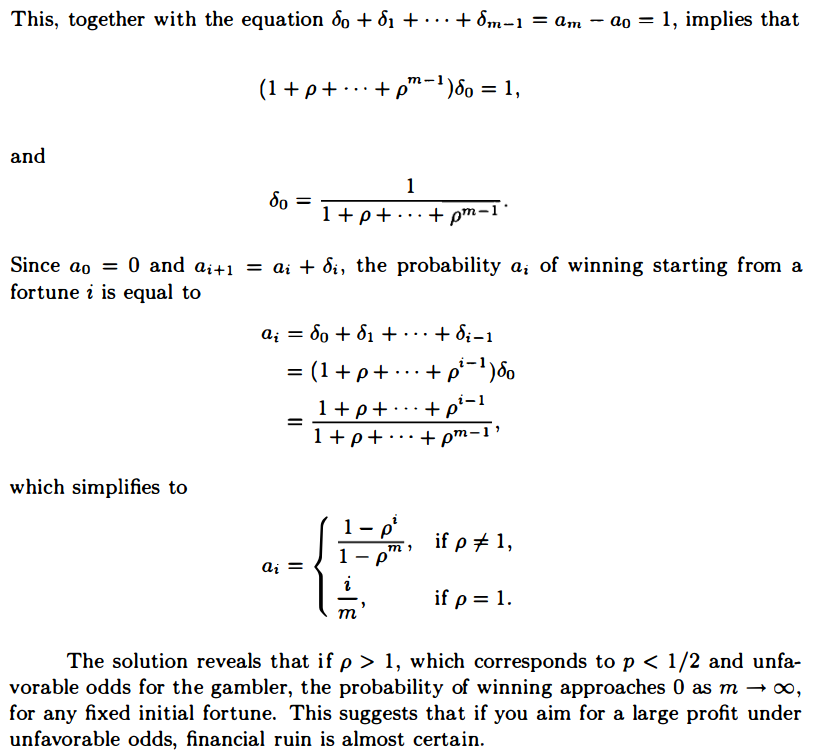

# Expected time to absorption

the number of steps until a recurrent state is entered starting from a particular transient state

$\mu_i$ = E[number of transitions till absorption, starting from i] 

or

 = [min{n>=0| X<sub>n</sub> is recurrent } | X<sub>0</sub> = i]

if i is recurrent then $\mu_i$ = 0 according to this def

we can derive equations for the $\mu_i$ by using the total expectation theorem

the arg is that time to absorption from a transient state i is equal to 1 plus the expected time to absorption from the next state j with prob P<sub>ij</sub>

attaining the system of linear equations below known to have a unique solution

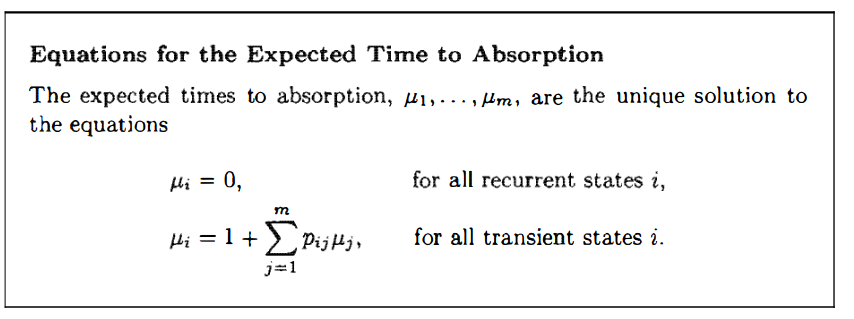

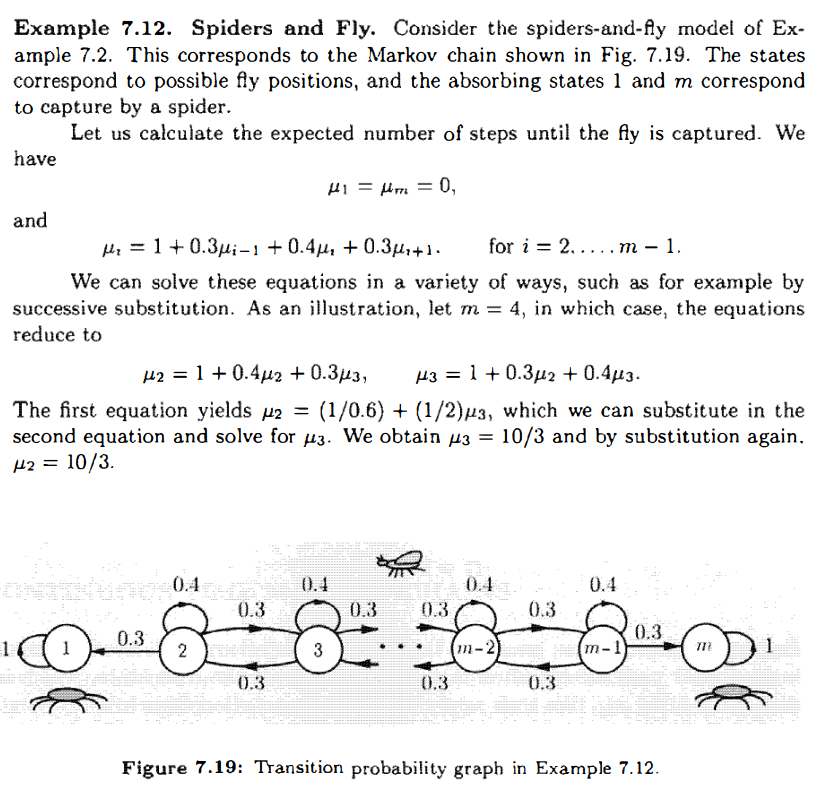

In [3]:
#see above for orig

# break into
#x = 1 + .4x + .3y
#y = 1 + .3x + .4y

#which resolves to 
#-1 = -.6x +.3y
#-1 = .3x + -.6y
import numpy as np

a = [[-.6,.3],[.3,-.6]]
#x = [[x],[y]]
b = [[-1],[-1]]

A = np.array(a)
inv_a = np.linalg.inv(A)

B = np.array(b)

#to find x and y given matrices a and b
X = np.linalg.inv(A).dot(B)

print(X)

#check
print((10/3))
print((10/3))



[[3.33333333]
 [3.33333333]]
3.3333333333333335
3.3333333333333335


# mean first passage and recurrence times

above concepts from time to absoption can be leveraged to calculate expected time to reach a particular recurrent state starting from any other state.

consider a markov chain with a single recurrent class.

focusing on a special recurrent state s and denoted by t<sub>i</sub> the mean first passage time form state i to state s is defined by


$\mu_i$ = E[number of transitions to reach s for the first time, starting from i] 

or

 = [min{n>=0| X<sub>n</sub> = s } | X<sub>0</sub> = i]

transitions out of state s are irrelevant to the calculation of the mean first passage times. 

we can consider this a new markov chain which is identical to the original except that the special state s is converted into an absorbing state (by setting p<sub>ss</sub> = 1 and p<sub>sj</sub> = o for all j != s).

With the above transforrm all states other than s become transient.

we then compute t<sub>i</sub> as the expected number of steps to absorption starting from i using the formulas earlier:

### 1. t<sub>i</sub> = 1 + $\sum_{j=1}^m p_{ij}t_{j}$ for all i != s
### 2. t<sub>s</sub> = 0 

the system of linear equations can be solved for unknown t<sub>i</sub>'s  and has a unique solution.

this gives the expected time to reach special state s from any other state.

to get the mean recurrence of the special state s defined as :


$\mu_i$ = E[number of transitions up to the first return to s, starting from s] 

or

 = [min{n>=0| X<sub>n</sub> = s } | X<sub>0</sub> = s]
 
 we obtain $t_{s}^m$, once we have the first passage times t<sub>i</sub> by using the equation
 
### $t_{s}^m$ = 1 + $\sum_{j=1}^m p_{ij}t_{j}$

this leverages the arguement that the time to return to s, starting from s is equal to 1 plus the expected time to reach s from the next state which is j with probability p<sub>sj</sub> and then apply total expectation theorem.


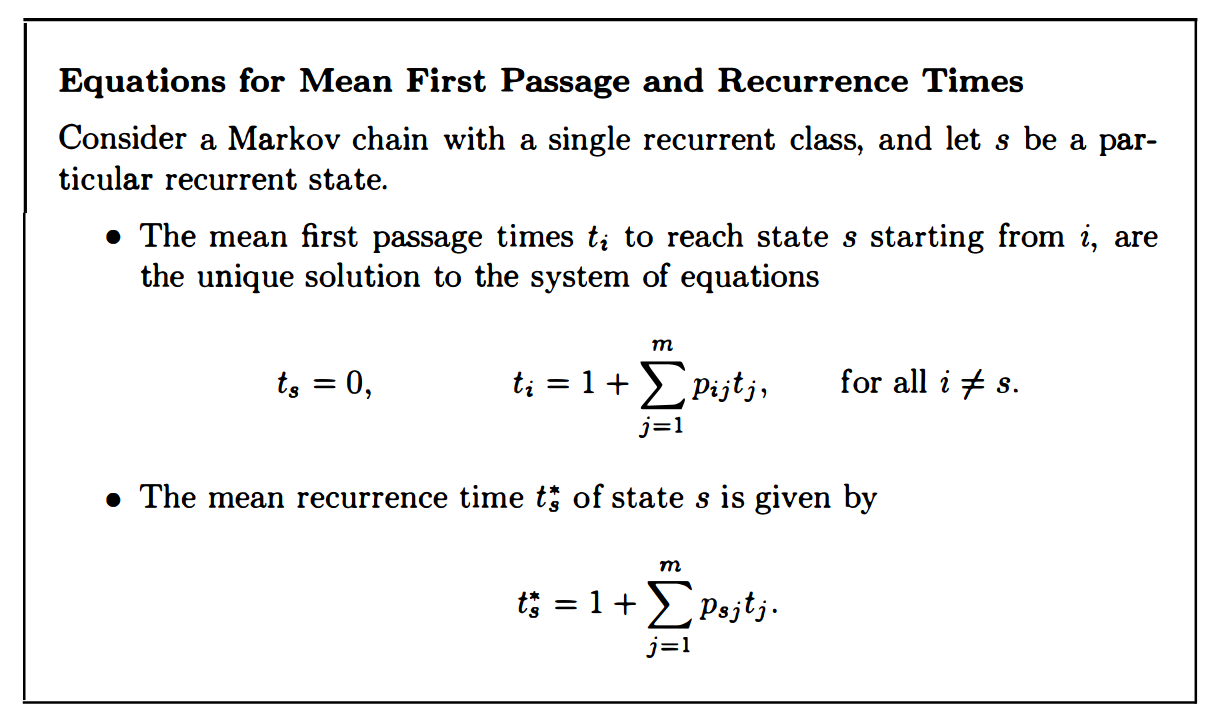

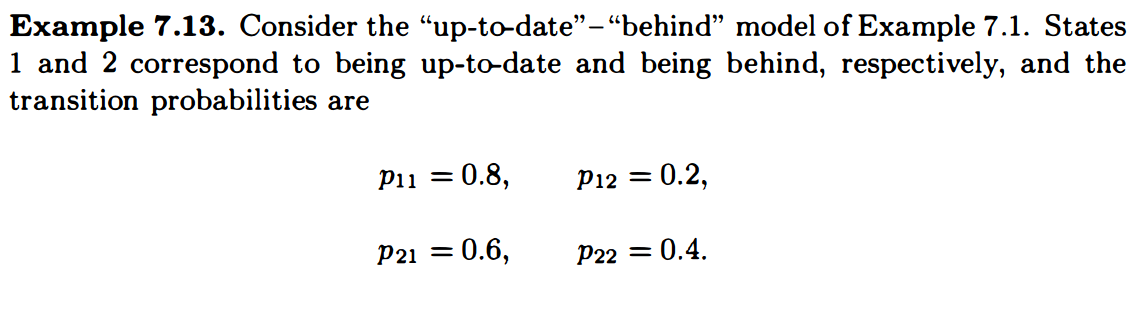

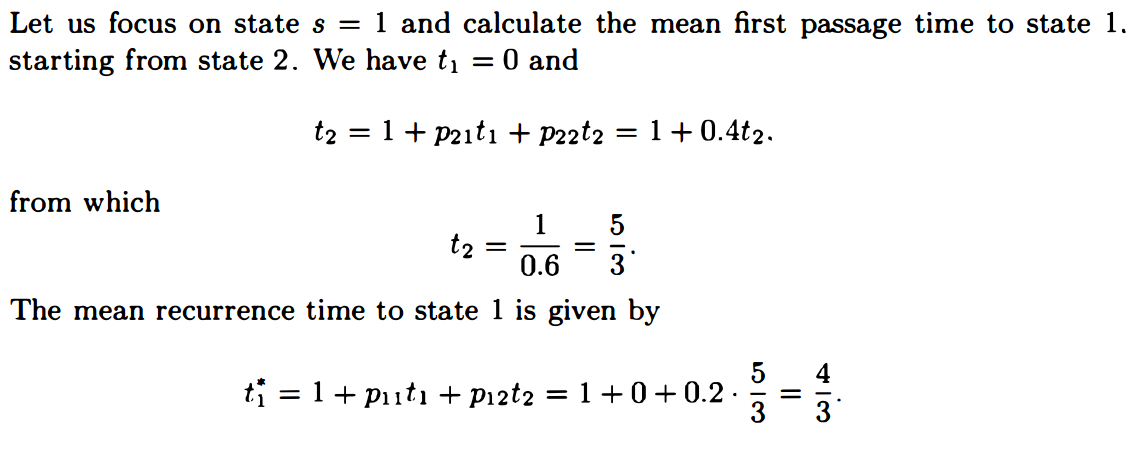